In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq
import matplotlib.ticker as ticker
from scipy.integrate import quad

## Wang et al 

/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


Text(0, 0.5, '$E_{tot}$ (J)')

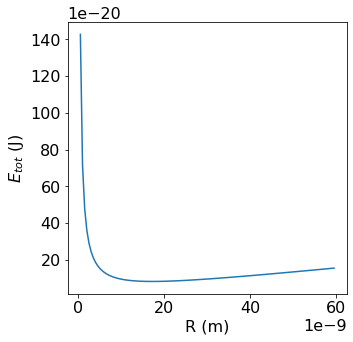

In [126]:
# calculate the total Energy of the skrmion model (single skyrmion) from Wang et al
# Here we assume B=0, core pol.= -1 = N
B = 0 
Msat = 954929.65 #A/m
Dind = 2.0e-3 #J/m2
Ku1 = 0.85e6 #J/m3
Aex = 10e-12 #J/m
u0 = 1.257e-6 # vacuum permeability
d = 1e-9 #thickness

K = Ku1 - (u0*(Msat**2)/2) #effective anisotropy including shape ani

# skyrmion domain wall width, eqn 13
w = (np.pi*Dind)/(4*K)

R_data = np.arange(0.0e-9,60e-9,0.5e-9)

# total energy eqn 10 
def Etot1(R):
    return (4*np.pi*d*( (Aex*(R/w) + Aex*(w/R))
                       - (Dind*(np.pi/2)*R)
                       + (K*w*R) 
                       + (Msat*B*((R**2)/2 + (w**2)*(np.pi**2)/24)) ))

fig, ax = plt.subplots(figsize=(5,5))
plt.plot(R_data,np.array([Etot1(R) for R in R_data]))
#plt.xticks(np.arange(min(R_data), max(R_data)+1, 0.5))
ax.ticklabel_format(axis='x', style = 'sci', scilimits=(-9,-9))
ax.ticklabel_format(axis='y', style = 'sci', scilimits=(-20,-20))
plt.rcParams.update({'font.size': 16})
plt.xlabel('R (m)')
plt.ylabel('$E_{tot}$ (J)')

In [125]:
l2 = [Etot1(R) for R in R_data]
R_data[l2.index(min(l2))]

/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


1.7e-08

Text(0, 0.5, '$E_{tot}$ (J)')

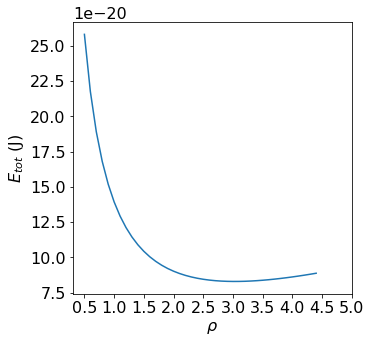

In [68]:
# total energy eqn 10 vs rho=R/w
rho_data = np.arange(0.5,4.5,0.1)
def Etot1(rho):
    return (4*np.pi*d*( (Aex*(rho) + Aex*(1/rho))
                       - (Dind*(np.pi/2)*(rho*w))
                       + (K*w*(rho*w)) ))
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(rho_data,np.array([Etot1(rho) for rho in rho_data]))
plt.xticks(np.arange(min(rho_data), max(rho_data)+1, 0.5))
ax.ticklabel_format(axis='y', style = 'sci', scilimits=(-20,-20))
plt.rcParams.update({'font.size': 16})
plt.xlabel('$\u03C1$')
plt.ylabel('$E_{tot}$ (J)')

## Buttner et al

In [127]:
# calculate the total Energy of the skrmion model (single skyrmion) from Buttner et al
# Initially we assume  Hz = -2T, core pol N= +1 (+z)
# Stray fields are not included 
#We use the approximations for the integral variable I
u0Hz = -2 # Tesla
Msat = 954929.65 #A/m
Dind = 2.0e-3 #J/m2
Ku1 = 0.85e6 #J/m3
Aex = 10e-12 #J/m
u0 = 1.257e-6 # vacuum permeability
d = 1e-9 #thickness
K = Ku1 - (u0*(Msat**2)/2) #effective anisotropy including shape ani, no other demag

# skyrmion domain wall width, eqn 13, Wang's
w = (np.pi*Dind)/(4*K)
#rho = R/w = x

#Exchange energy
def E_A(x):
    #x = r/w #change to r as E_A(r)
    Ia = 2*x + 2/x + 1.93*(x-0.65)*np.exp(-1.48*(x-0.65))
    Ea = 2*np.pi*Aex*d*Ia
    return Ea

#Anisotropy energy
def E_K(x):
    #x = r/w #change to r as E_A(r)
    Ik = 2*x - (1/3)*np.exp(-x/np.sqrt(2))
    Ek = 2*np.pi*K*d*(w**2)*Ik
    return Ek

#DMI energy
psi = 0 #domain wall angle 0 or pi for Neel sk
def E_DMI(x):
    Idmi = np.pi*x + (1/2)*np.exp(-x)
    Edmi = -2*np.pi*d*w*(Dind*np.cos(psi))*Idmi #no bulk DMI
    return Edmi

#Zeeman energy 
def E_Z(x):
    Iz = x**2 + ((np.pi**2)/12) - 0.42*np.exp(-x**2)
    Ez = -2*np.pi*u0Hz*Msat*d*(w**2)*Iz
    return Ez

#total energy
def E_tot2(x):
    return E_Z(x)+E_DMI(x)+E_A(x)+E_K(x)

#DW energies
def E_DW(x):
    return E_DMI(x)+E_A(x)+E_K(x)


Text(0, 0.5, '$E_{Aex}$ (J)')

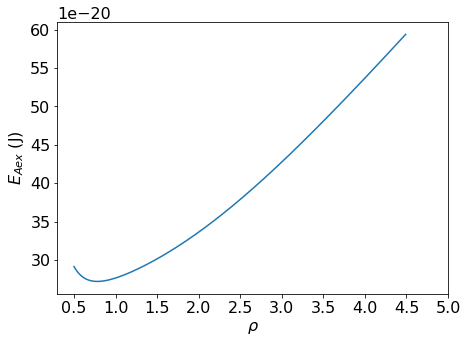

In [80]:
# Plotting Energy terms vs. rho
fig, ax = plt.subplots(figsize=(7,5))
rho_data = np.arange(0.5,4.5,0.01)
plt.plot(rho_data,np.array([E_A(rho) for rho in rho_data]))
plt.xticks(np.arange(min(rho_data), max(rho_data)+1, 0.5))
ax.ticklabel_format(axis='y', style = 'sci', scilimits=(-20,-20))
plt.rcParams.update({'font.size': 16})
plt.xlabel('$\u03C1$')
plt.ylabel('$E_{Aex}$ (J)')

In [7]:
# calculate the total Energy of the skrmion model (single skyrmion) from Buttner et al
# Initialy we assume  Hz = -2T, core pol N= +1 (+z)
# Stray fields are not included 
#We use the approximations for the integral variable I
u0Hz = 3.0 # Tesla
Msat = 954929.65 #A/m
Dind = 2.0e-3 #J/m2
Ku1 = 0.85e6 #J/m3
Aex = 10e-12 #J/m
u0 = 1.257e-6 # vacuum permeability
d = 1e-9 #thickness
K = Ku1 - (u0*(Msat**2)/2) #effective anisotropy including shape ani, no other demag
Jint = -0.13e-3 #J/m2

# skyrmion domain wall width, eqn 13, Wang's
#w = (np.pi*Dind)/(4*K)
w = 1.75e-9
#rho = R/w = x

#Exchange energy
def E_A(r):
    x = r/w #change to r as E_A(r)
    Ia = 2*x + 2/x + 1.93*(x-0.65)*np.exp(-1.48*(x-0.65))
    Ea = 2*np.pi*Aex*d*Ia
    return Ea

#Anisotropy energy
def E_K(r):
    x = r/w #change to r as E_A(r)
    Ik = 2*x - (1/3)*np.exp(-x/np.sqrt(2))
    Ek = 2*np.pi*K*d*(w**2)*Ik
    return Ek

#DMI energy
psi = 0 #domain wall angle 0 or pi for Neel sk
def E_DMI(r):
    x = r/w
    Idmi = (np.pi*x) + ((1/2)*np.exp(-x))
    Edmi = -2*np.pi*d*w*(Dind*np.cos(psi))*Idmi #no bulk DMI
    return Edmi

#Zeeman energy 
def E_Z(r):
    x = r/w
    Iz = x**2 + ((np.pi**2)/12) - 0.42*np.exp(-x**2)
    Ez = -2*np.pi*u0Hz*Msat*d*(w**2)*Iz
    return Ez

#Interlayer exchange energy
# watch the order of variables in the functions arguments since quad will go from right to left of Iiec
def E_iec(r):
    x = r/w
    def Iiec(y,x):
        #np.arctan(np.exp(y-x)) + np.arctan(np.exp(y+x)) Buttner et al 
        #np.arctan(np.sinh(x)/np.sinh(y)) Wang et al
        theta1 = 2*(np.arctan(np.exp(y-x)) + np.arctan(np.exp(y+x))) - np.pi
        return np.cos( 2*theta1 + np.pi )
    return -Jint*2*np.pi*d*w*quad(Iiec, 0, np.inf, args=(x))[0]


#total energy
def E_tot2(r):
    return (E_Z(r)+E_DMI(r)+E_A(r)+E_K(r))+E_iec(r)

#DW energies
def E_DW(r):
    return E_DMI(r)+E_A(r)+E_K(r)


/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:58: IntegrationWarning: The integral is probably divergent, or slowly convergent.
/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:58: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.


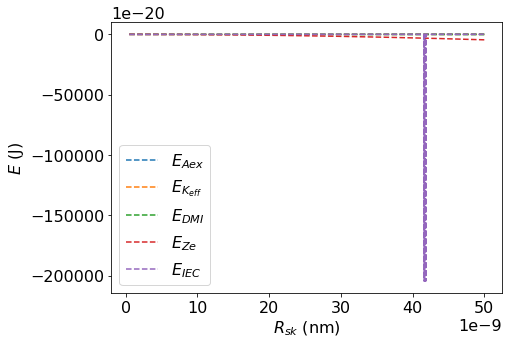

In [8]:
# Plotting Energy terms vs. R
fig, ax = plt.subplots(figsize=(7,5))
R_data = np.arange(0.5e-9,50.0e-9,0.01e-9)
plt.plot(R_data,np.array([E_A(R) for R in R_data]),label = '$E_{Aex}$',linestyle = '--')
plt.plot(R_data,np.array([E_K(R) for R in R_data]),label = '$E_{K_{eff}}$',linestyle = '--')
plt.plot(R_data,np.array([E_DMI(R) for R in R_data]),label = '$E_{DMI}$',linestyle = '--')
plt.plot(R_data,np.array([E_Z(R) for R in R_data]),label = '$E_{Ze}$',linestyle = '--')
plt.plot(R_data,np.array([E_iec(R) for R in R_data]),label = '$E_{IEC}$',linestyle = '--')
#plt.plot(R_data,np.array([E_tot2(R) for R in R_data]),label = '$E_{tot}$')
#plt.xticks(np.arange(min(R_data), max(R_data)+1e-9,0.5e-9 ))
ax.ticklabel_format(axis='y', style = 'sci', scilimits=(-20,-20))
ax.ticklabel_format(axis='x', style = 'sci', scilimits=(-9,-9))
plt.rcParams.update({'font.size': 16})
plt.xlabel('$R_{sk}$ (nm)')
plt.ylabel('$E$ (J)')
plt.legend()

In [17]:
np.savetxt("E_tot_2Sky.csv",  [E_tot2(R) for R in R_data], delimiter=",")

/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:58: IntegrationWarning: The integral is probably divergent, or slowly convergent.


/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:58: IntegrationWarning: The integral is probably divergent, or slowly convergent.


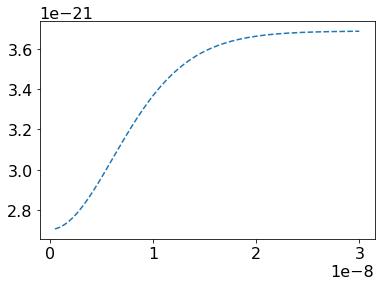

In [10]:
plt.plot(R_data,np.array([E_iec(R) for R in R_data]),label = '$E_{IEC}$',linestyle = '--')

In [15]:
l1 = [E_tot2(R) for R in R_data]
R_data[l1.index(min(l1))]

/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:58: IntegrationWarning: The integral is probably divergent, or slowly convergent.


1.9929999999999934e-08

/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
/kuacc/apps/anaconda/3.6/lib/python3.7/site-packages/ipykernel_launcher.py:58: IntegrationWarning: The integral is probably divergent, or slowly convergent.


Text(0.5, 1.0, 'E_iec vs. R of sky with w fixed')

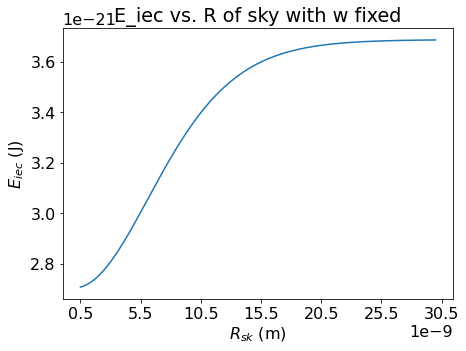

In [13]:
# Plotting Energy terms vs. R
fig, ax = plt.subplots(figsize=(7,5))
#R_data = np.arange(0.1e-9,4.5e-9,0.01e-9)
R_data = np.arange(0.5e-9,30.0e-9,0.01e-9)
plt.plot(R_data,np.array([E_iec(R) for R in R_data]))
plt.xticks(np.arange(min(R_data), max(R_data)+1e-9,5e-9 ))
ax.ticklabel_format(axis='x', style = 'sci', scilimits=(-9,-9))
plt.rcParams.update({'font.size': 16})
plt.xlabel('$R_{sk}$ (m)')
plt.ylabel('$E_{iec}$ (J)')
plt.title('E_iec vs. R of sky with w fixed')

In [15]:
w

5.673269467157775e-09